> ### [Exploratory Analysis - Instacart](https://www.kaggle.com/philippsp/exploratory-analysis-instacart/notebook)
> *Philipp Spachtholz*

> #### Welcome and good luck to you all at Instacart Market Basket Competition!
> Here is a first exploratory analysis of the competition dataset. On its website Instacart has a recommendation feature, suggesting the users some items that he/she may buy again. Our task is to predict which items will be reordered on the next order.

> The dataset consists of information about 3.4 million grocery orders, distributed across 6 csv files.

### Translated to Python by Hiram Foster
I'd like to thank [Dr. Spachtholz (@phillippsp)](https://www.kaggle.com/philippsp) for his wonderful work and for teaching us how to do some great exploratory data analysis. This is my first Kaggle Competition and first independent Data Science project. I have noted his original words with blockquotes; my own words are in regular paragraph formatting. My goal for this notebook was to practice Python/Pandas/Matplotlib skills and exploratory analysis techniques, as well as demonstrate how R techniques can be implemented with Pandas DataFrames. I learned that plotting with R is much easier than with Matplotlib and it has some nice features with notebooks, such as tabs for different tables and pages for long tables. Enjoy!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')

Play around with the dtype assignments. For some columns, I downcast the dtype to minimize the size of the DataFrame.

In [8]:
orders = pd.read_csv('../input/orders.csv', index_col='order_id', dtype={'order_id':'int32', 
                                                               'user_id':'int32',
                                                               'eval_set':'category', 
                                                               'order_dow':'category', 
                                                               'order_hour_of_day':'int8', #could also be category
                                                               'days_since_prior_order':'float16'})
products = pd.read_csv('../input/products.csv', index_col='product_id', dtype={'product_id':'int32', 
                                                                   'product_name':'object', 
                                                                   'aisle_id':'int16', 
                                                                   'department_id':'int16'})
order_products_train = pd.read_csv('../input/order_products__train.csv', dtype={'order_id':'int32',
                                                                                     'product_id':'int32',
                                                                                     'add_to_cart_order':'int8',
                                                                                     'reordered':'uint8'})
order_products_prior = pd.read_csv('../input/order_products__prior.csv', dtype={'order_id':'int32',
                                                                                     'product_id':'int32',
                                                                                     'add_to_cart_order':'int8',
                                                                                     'reordered':'uint8'})
aisles = pd.read_csv('../input/aisles.csv', index_col='aisle_id', 
                     dtype={'aisle_id':'int16', 'aisle':'category'})
departments = pd.read_csv('../input/departments.csv', index_col='department_id', 
                          dtype={'department_id':'int8', 'department':'category'})

> ## When do people order?
> Let's have a look when people buy groceries online.
> ## Hour of Day
> There is a clear effect of hour of day on order volume. Most orders are between 8.00-18.00

/home/hiram/miniconda2/envs/kaggle/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


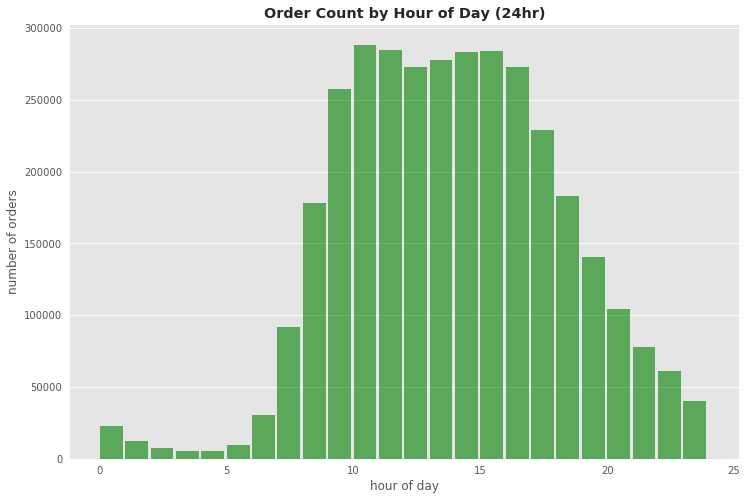

In [3]:
plt.figure(figsize=(12, 8))
plt.title('Order Count by Hour of Day (24hr)', fontweight='bold')
plt.ylabel('number of orders')
plt.xlabel('hour of day')
plt.hist(orders.order_hour_of_day, bins=np.arange(25), width=0.9, facecolor='green', alpha=0.6)
plt.grid(axis='x')
plt.show()

> ## Day of Week
> There is a clear effect of day of the week. Most orders are on Sunday(0) and Monday(1).

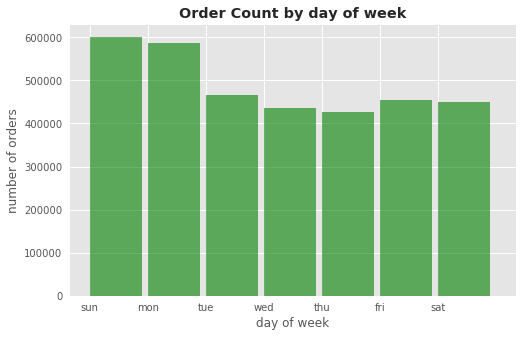

In [4]:
plt.clf()
days=['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']
plt.figure(figsize=(8,5))
plt.hist(orders.order_dow.astype('int8'), bins=np.arange(8), width=0.9, facecolor='green', alpha=0.6)
plt.xticks(np.arange(7), ('sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'))
plt.title('Order Count by day of week', fontweight='bold')
plt.xlabel('day of week')
plt.ylabel('number of orders')
plt.show()


>## When do they order again?
>People seem to order more often after exactly 1 week.

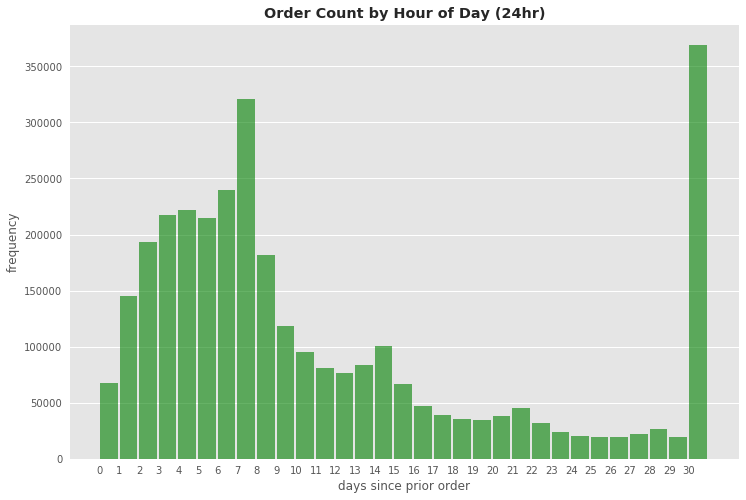

In [5]:
plt.figure(figsize=(12, 8))
plt.title('Order Count by Hour of Day (24hr)', fontweight='bold')
plt.ylabel('frequency')
plt.xlabel('days since prior order')
plt.hist(orders.days_since_prior_order.dropna(), bins=np.arange(32), width=0.9, facecolor='green', alpha=0.6)
plt.grid(axis='x')
plt.xticks(np.arange(31))
plt.show()

> ## How many prior orders are there?
> We can see that there are always at least 3 prior orders.

My graph shows that there are some customers who have placed 100+ orders.

<sub> Here, I used a different kind of graph than Dr. Spachtholz (line vs. bar)

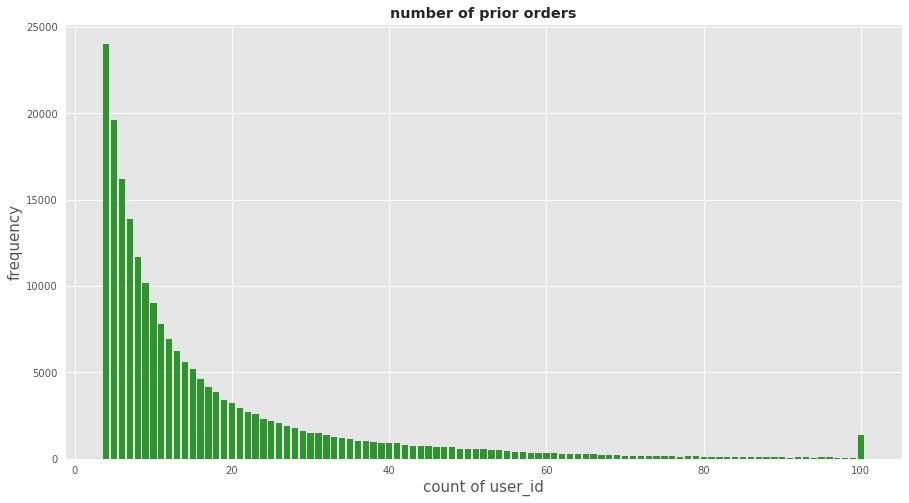

In [6]:
unique, counts = np.unique(orders.user_id.value_counts().values, return_counts=True)
plt.clf()
ind = np.arange(100)
fig=plt.figure(figsize=(15,8))
fig.add_axes()

ax1 = fig.add_subplot(111)
ax1.bar(unique, counts, color='g', alpha=0.8)
ax1.set_title('number of prior orders', fontweight='bold')
ax1.set_xlabel('count of user_id', fontsize=15)
ax1.set_ylabel('frequency', fontsize=15)

plt.show()

>## How many items do people buy?
>Let’s have a look how many items are in the orders. We can see that people most often order around 5 items. The distributions are comparable between the train and prior order set.

My data shows shows there is some difference between the two sets. Namely, the prior dataset shows some orders have a very large number of items.

In [7]:
y_train = order_products_train.groupby('order_id').add_to_cart_order.max().value_counts().sort_index().values
x_train = order_products_train.groupby('order_id').add_to_cart_order.max().value_counts().sort_index().index.values
y_prior = order_products_prior.groupby('order_id').add_to_cart_order.max().value_counts().sort_index().values
x_prior = order_products_prior.groupby('order_id').add_to_cart_order.max().value_counts().sort_index().index.values

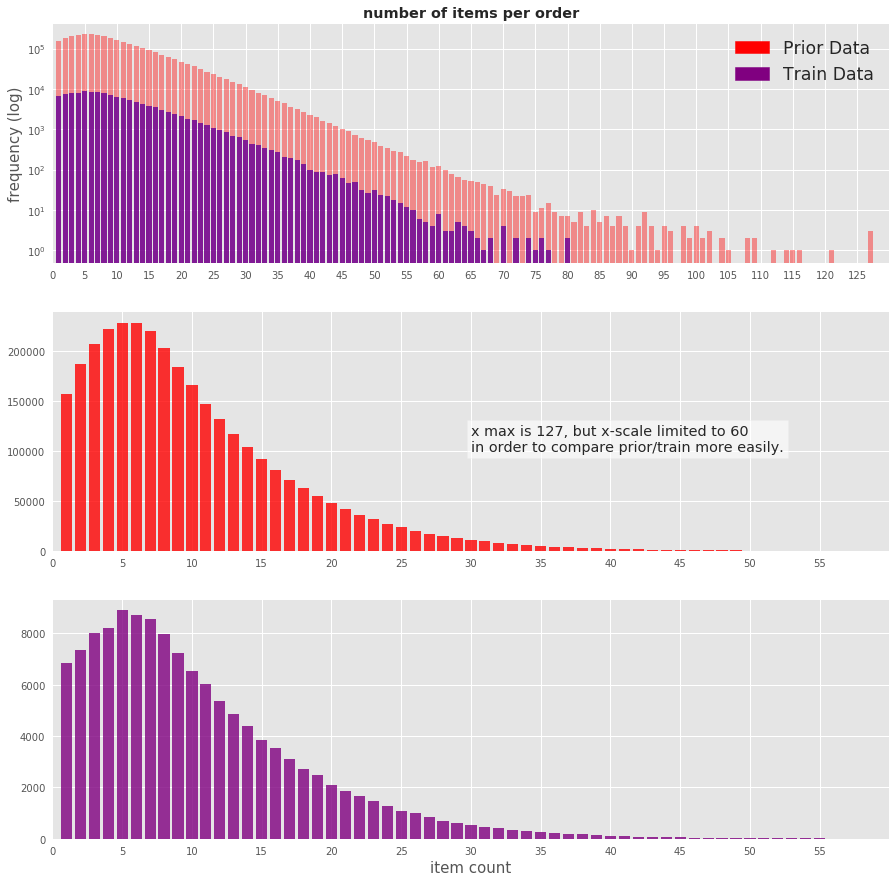

In [8]:
plt.clf()
import matplotlib.patches as mpatches

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,15))

ax1.bar(x_train, y_train, color='b', alpha=0.8)
ax1.set_title('number of items per order', fontweight='bold')
ax1.set_ylabel('frequency (log)', fontsize=15)

ax1.set_xlim(0,130)
ax1.set_yscale('log')
ax1.set_xticks(np.arange(0,130, 5))
ax1.bar(x_prior, y_prior, color='r', alpha=0.4)
red_patch = mpatches.Patch(color='red', label='Prior Data')
purple_patch = mpatches.Patch(color='purple', label='Train Data')
ax1.legend(handles=[red_patch, purple_patch], fontsize='xx-large')

ax2.bar(x_prior, y_prior, color='r', alpha=0.8)
#ax2.set_title('prior data')
ax2.set_xlim(0,60)
ax2.set_xticks(np.arange(0,60, 5))
ax2.text(30,100000,
         'x max is 127, but x-scale limited to 60 \nin order to compare prior/train more easily.',
         bbox=dict(facecolor='white', alpha=0.6), fontsize='x-large')

ax3.bar(x_train, y_train, color='purple', alpha=0.8)
#ax3.set_title('train data')
ax3.set_xlim(0, 60)
ax3.set_xticks(np.arange(0,60,5))
ax3.set_xlabel('item count', fontsize=15)



plt.show()

> ## Bestsellers
> Let’s have a look which products are sold most often (top10). And the clear winner is: Bananas

Top 10 Bestselling Items


,count,product_name
13176,15480,Bag of Organic Bananas
16797,6494,Strawberries
21137,10894,Organic Strawberries
21903,9784,Organic Baby Spinach
24852,18726,Banana
26209,6033,Limes
27966,5546,Organic Raspberries
47209,7293,Organic Hass Avocado
47626,8135,Large Lemon
47766,7409,Organic Avocado


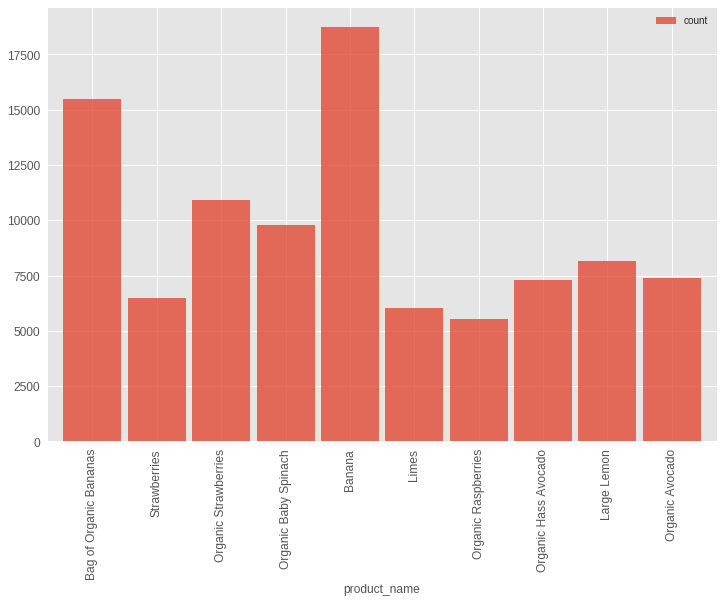

In [10]:
top_n=10
print ('Top {0} Bestselling Items'.format(top_n))
temp = pd.merge(left=order_products_train.product_id.value_counts().nlargest(top_n).to_frame('count'), right=products[['product_name']], left_index=True, right_index=True)

display(temp)
temp.plot(x='product_name', y='count', kind='bar', figsize=(12,8), width=.9, fontsize='large', alpha=0.8)

> ## How often to people order the same items again?

,count,proportion (%)
1,828824,59.86
0,555793,40.14


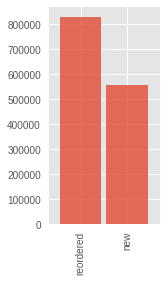

59.86% of the ordered items are reordered


In [11]:
temp = order_products_train['reordered'].value_counts().to_frame('count')
temp['proportion (%)'] = (temp['count']/temp['count'].sum()*100).round(2)
display(temp)

plt.clf()
ax = temp.plot(y='count', kind='bar', figsize=(2,4), legend=False, width=.9, alpha=0.8)
ax.set_xticklabels(['reordered', 'new'])
plt.show()

print ('{0}% of the ordered items are reordered'.format(temp.iloc[0,1]))

> ## Most often reordered
> Now here it becomes really interesting. These 10 products have the highest probability of being reordered.

@philippsp set the count cutoff at >40, I set my cutoff at > 35 (mean count = 35.4)


,proportion_reordered,product_name,aisle_id,department_id,count,reordered
product_id,,,,,,
1729,0.934783,2% Lactose Free Milk,84,16,92,86
20940,0.913043,Organic Low Fat Milk,84,16,368,336
12193,0.898305,100% Florida Orange Juice,98,7,59,53
21038,0.888889,Organic Spelt Tortillas,128,3,81,72
31764,0.888889,Original Sparkling Seltzer Water Cans,115,7,45,40
24852,0.884172,Banana,24,4,18726,16557
117,0.883333,Petit Suisse Fruit,2,16,120,106
39180,0.881988,Organic Lowfat 1% Milk,84,16,483,426
12384,0.881041,Organic Lactose Free 1% Lowfat Milk,91,16,269,237


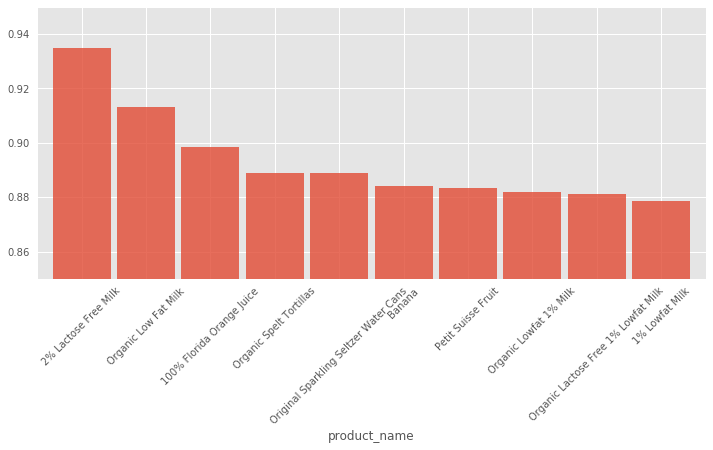

In [11]:
temp = pd.merge(left=order_products_train.groupby('product_id').reordered.mean().to_frame('proportion_reordered'), 
                right=products, left_index=True, right_index=True)
temp = pd.merge(left=temp,
                right=order_products_train.product_id.value_counts().to_frame('count'),  
                left_index=True, right_index=True)
temp = pd.merge(left=temp,
                right=pd.DataFrame(order_products_train.groupby('product_id').reordered.sum().to_frame(), dtype='int64'),  
                left_index=True, right_index=True)
temp.index.rename('product_id', inplace=True)


display(temp[temp['count']>35].nlargest(10, 'proportion_reordered').sort_values(['proportion_reordered'], ascending=False))

plt.clf()
ax = temp[temp['count']>35].nlargest(10, 'proportion_reordered').plot(x='product_name', 
                                                                      y='proportion_reordered', 
                                                                      kind='bar', 
                                                                      legend=False,
                                                                      figsize=(12,5),
                                                                      width=.9, rot=45, alpha=0.8)
ax.set_ylim(.85, .95)
plt.show()

## Proportion Reordered for Departments

I decided to zoom out a bit and look at the data for departments and aisles

,department_reordered,department_sum,proportion_reordered,department
department_id,,,,
16,146502,217051,0.674966,dairy eggs
4,271886,409087,0.664617,produce
7,75060,114046,0.658155,beverages
3,30692,48394,0.634211,bakery
8,2834,4497,0.630198,pets
20,27367,44291,0.617891,deli
5,3397,5598,0.606824,alcohol
12,17907,30307,0.590854,meat seafood
19,69102,118862,0.581363,snacks


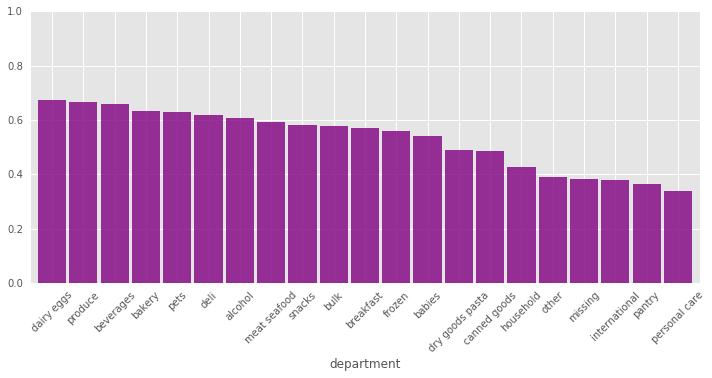

In [12]:
depts = pd.DataFrame({'department_sum':temp.groupby('department_id')['count'].sum(),
              'department_reordered':temp.groupby('department_id')['reordered'].sum()})

depts['proportion_reordered'] = depts['department_reordered']/depts['department_sum']

depts = pd.merge(left=depts,
               right = departments,
               left_index=True,
               right_index=True)

display(depts.sort_values('proportion_reordered', ascending=False))

plt.clf()
ax = depts.sort_values('proportion_reordered', ascending=False).plot(x='department', 
                                                                     y='proportion_reordered', 
                                                                     kind='bar', 
                                                                     color='purple', alpha=0.8, legend=False,
                                                                     figsize=(12,5), width=.9, rot=45)
ax.set_ylim(0,1)
plt.show()

## 10 Most Reordered Aisles

,aisle_reordered,aisle_sum,proportion_reordered,aisle
aisle_id,,,,
84,25864,32644,0.792305,milk
115,27011,36617,0.737663,water seltzer sparkling water
24,110782,150473,0.736225,fresh fruits
86,14488,19875,0.728956,eggs
32,9657,13460,0.717459,packaged produce
53,8510,12356,0.688734,cream
91,18046,26240,0.687729,soy lactosefree
120,37939,55240,0.686803,yogurt
62,744,1088,0.683824,white wines


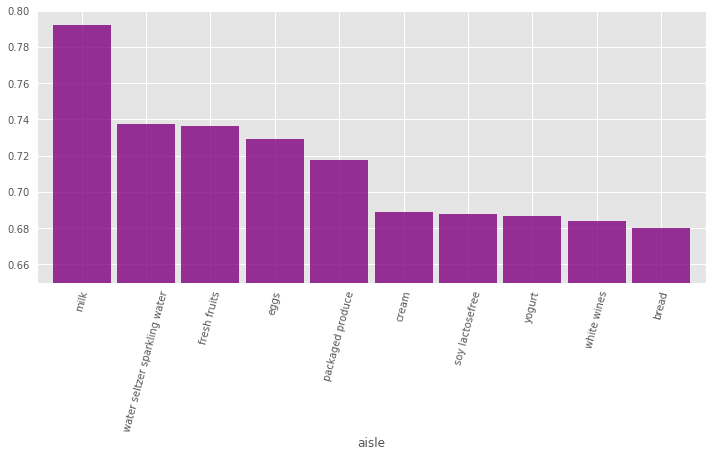

In [13]:
ais = pd.DataFrame({'aisle_sum':temp.groupby('aisle_id')['count'].sum(),
              'aisle_reordered':temp.groupby('aisle_id')['reordered'].sum()})

ais['proportion_reordered'] = ais['aisle_reordered']/ais['aisle_sum']

ais = pd.merge(left=ais,
               right = aisles,
               left_index=True,
               right_index=True)

display(ais.nlargest(10, 'proportion_reordered').sort_values('proportion_reordered', ascending=False))

plt.clf()
ax = ais.nlargest(10, 'proportion_reordered').plot(x='aisle', y='proportion_reordered', 
                                                   kind='bar', color='purple', alpha=0.8, 
                                                   legend=False,figsize=(12,5), width=.9, rot=75)
ax.set_ylim(.65, .8)
plt.show()

> ## Which item do people put into the cart first?
> People seem to be quite certain about Multifold Towels and if they buy them, put them into their cart first in 66% of the time.

As above, I set the num_ordered > 35. However, @phillippsp set the number added first > 10, which returns a notably different list. 

Drinking Water is a popular item to put in the cart first. However, these counts are pretty low. It might be helpful to look at departments rather than individual items.

In [14]:
temp = pd.DataFrame({'num_ordered':order_products_train.groupby(['product_id']).order_id.count(),
              'first':order_products_train[(order_products_train.add_to_cart_order==1)].groupby('product_id').order_id.count()})
temp['pct_first'] = temp['first']/temp['num_ordered']
temp = pd.merge(left=temp,
               right=products,
               left_index=True,
               right_index=True)
temp.dropna(inplace=True)
temp['first'] = temp['first'].astype(int)
display(temp[temp['num_ordered']>35].nlargest(10, 'pct_first').sort_values('pct_first', ascending=False))

temp = temp[['first', 'num_ordered', 'department_id']].groupby('department_id').sum()
temp['pct_first'] = temp['first']/temp['num_ordered']
pd.merge(left=temp, right=departments, left_index=True, right_index=True).sort_values('pct_first', ascending=False)

,first,num_ordered,pct_first,product_name,aisle_id,department_id
product_id,,,,,,
45004,39,59,0.661017,White Multifold Towels,54,17
11885,41,69,0.594203,"Sparkling Water, Bottles",115,7
1729,48,92,0.521739,2% Lactose Free Milk,84,16
6729,35,72,0.486111,Cookie Tray,8,3
26405,47,105,0.447619,XL Pick-A-Size Paper Towel Rolls,54,17
13948,27,61,0.442623,Wastebasket Liners,60,17
4731,22,51,0.431373,Classic Roast,26,7
26900,24,56,0.428571,USDA AA Extra Large Eggs,86,16
40939,145,342,0.423977,Drinking Water,115,7


,first,num_ordered,pct_first,department
department_id,,,,
5,1268,4862,0.260798,alcohol
8,600,3030,0.198020,pets
2,233,1237,0.188359,other
11,2488,13954,0.178300,personal care
7,18073,107727,0.167767,beverages
17,4124,31632,0.130374,household
16,25433,210006,0.121106,dairy eggs
10,138,1275,0.108235,bulk
12,3011,28878,0.104266,meat seafood


##### People seem to be pretty sure about alcohol(26%) and their pets(20%)!

> ## Association between time of last order and probability of reorder
> This is interesting: We can see that if people order again on the same day, they order the same product more often. Whereas when 30 days have passed, they tend to try out new things in their order.

I used a line graph rather than a bar chart.

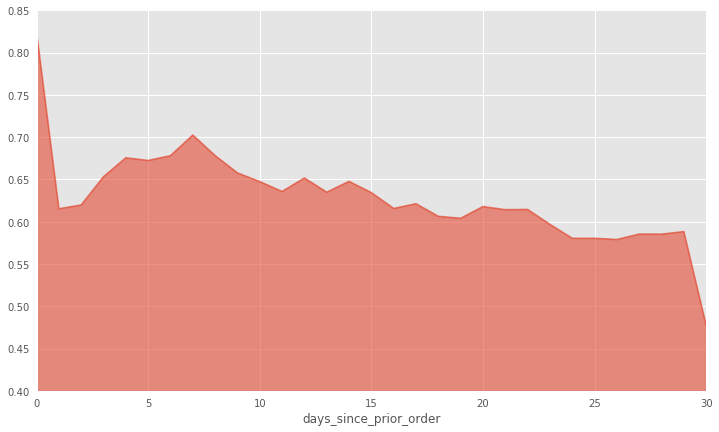

In [15]:
plt.clf()
ax = pd.merge(left=order_products_train,
        right=orders, 
        left_on='order_id',
        right_index=True).groupby('days_since_prior_order').reordered.mean().plot.area(figsize=(12,7), alpha=.6)
ax.set_ylim(.4, .85)
plt.show()

>## Association between number of orders and probability of reordering
> Products with a high number of orders are naturally more likely to be reordered. However, there seems to be a ceiling effect.

,reorder_rate,n
1,0.644737,76.0
2,0.250000,4.0
3,1.000000,6.0
4,0.636364,22.0
8,0.538462,13.0


/home/hiram/miniconda2/envs/kaggle/lib/python2.7/site-packages/seaborn/linearmodels.py:267: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


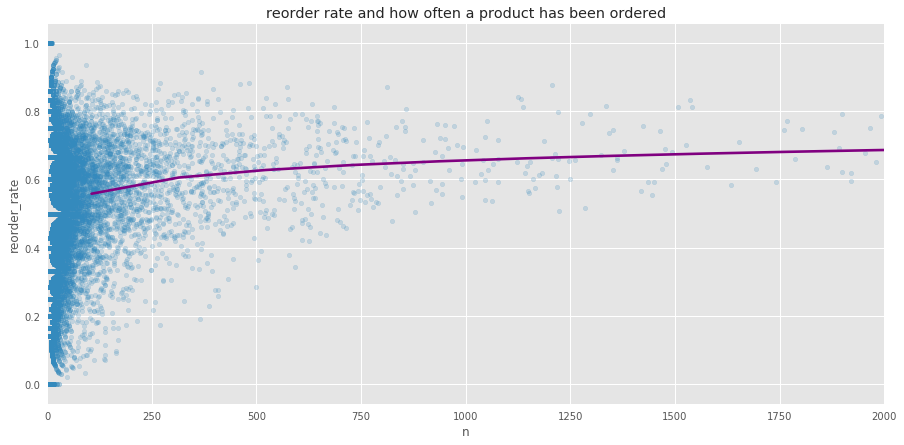

In [16]:
temp = pd.merge(left=order_products_train.groupby('product_id').reordered.mean().to_frame('reorder_rate'),
        right=order_products_train.product_id.value_counts().where(lambda x : x>1).to_frame('n').dropna(),
        left_index=True,
        right_index=True)

display(temp.head())


plt.clf()
ax = temp.plot.scatter(y='reorder_rate', x='n', figsize=(15,7), alpha=0.2)
sns.regplot(x="n", y="reorder_rate", data=temp, scatter=False, logx=True, color='purple', ci=None)
ax.set_xlim(0, 2000)
ax.set_title('reorder rate and how often a product has been ordered')
plt.show()

> ## Organic vs Non-organic
> What is the percentage of orders that are organic vs. not organic?

Organic items make up less than 30% of orders but they are reordered more often than non-organic items. I extended @phillippsp's analysis, adding reorder counts and reorder rates.

In [17]:
products['organic'] = np.where(products['product_name'].str.contains('rganic'), 1, 0)

,count,reordered,percent_of_sales,reorder_rate
organic,,,,
0,979021,566360,0.70707,0.578496
1,405596,262464,0.29293,0.647107


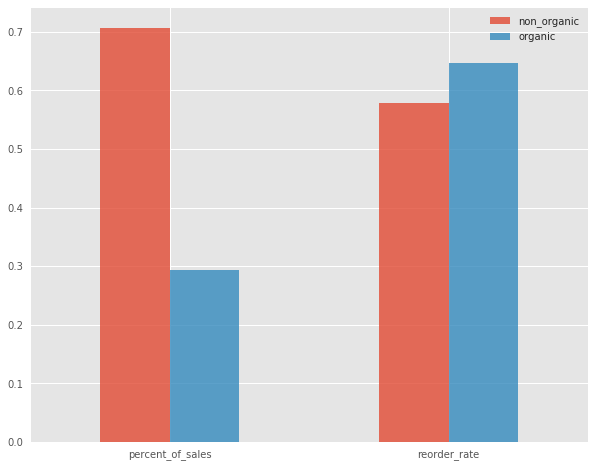

In [18]:
temp = pd.merge(left=order_products_train,
               right=products[['organic']],
               left_on='product_id',
               right_index=True)

temp = pd.merge(left=temp.groupby('organic').count()['order_id'].to_frame('count'),
         right=temp[['reordered', 'organic']].groupby('organic').sum().astype(int),
         left_index=True,
         right_index=True)

temp['percent_of_sales'] = temp['count']/temp['count'].sum()
temp['reorder_rate'] = temp['reordered']/temp['count']

display(temp)

temp = temp[['percent_of_sales', 'reorder_rate']].transpose()
temp.columns = ['non_organic', 'organic']
temp.plot.bar(alpha=0.8, rot=0, figsize=(10,8))

## Visualizing the Product Portfolio -> Visualizing Departments

Treemaps are (mostly) outside of the capability of Python, so I implemented a function that returns product counts for a particular department.

In [19]:
def get_dept_counts(department):
    # add names, product counts of departments/aisles to order_products
    temp = pd.merge(left=order_products_train.product_id.value_counts().to_frame('count'), 
             right=pd.merge(left=pd.merge(left=products, right=departments, left_on='department_id', right_index=True),
                          right=aisles, left_on='aisle_id', right_index=True), left_index=True, right_index=True)
    # add count of reordered
    temp = pd.merge(left=temp,
                right=pd.DataFrame(order_products_train.groupby('product_id').reordered.sum().to_frame(), dtype='int64'),  
                left_index=True, right_index=True)
    # subset temp for 'department' and set index to aisle name
    temp = pd.merge(left=temp[temp.department==department].drop(['department_id', 'organic'], axis=1).groupby('aisle_id').sum(),
             right=aisles, left_index=True, right_index=True).set_index('aisle')
    return temp

def show_dept(department):
    display(get_dept_counts(department))
    ax = get_dept_counts(department).plot.bar(width=0.75, alpha=0.8, rot=75)
    ax.set_title(department)
    plt.show()

,count,reordered
aisle,,
fresh herbs,16052,8556
fresh fruits,150473,110782
packaged produce,13460,9657
fresh vegetables,150609,91368
packaged vegetables fruits,78493,51523


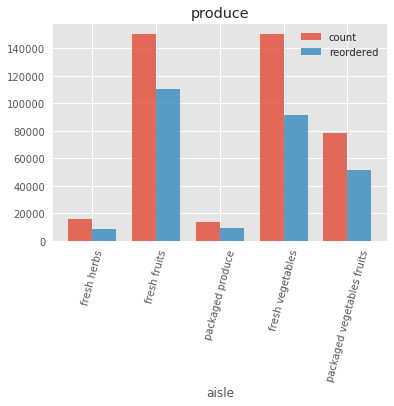

In [20]:
show_dept('produce')

#### Change it up and look at the rates instead of the counts.

In [21]:
def stacked(department):
    foo = get_dept_counts(department)
    foo['reorder_rate'] = foo['reordered']/foo['count']
    foo['not_reorder_rate'] = 1-foo['reorder_rate']
    ax = foo[['reorder_rate', 'not_reorder_rate']].plot.bar(stacked=True, alpha=0.7, color=['green', 'gray'])
    ax.set_yticks(np.arange(0,1.1, 0.1))
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

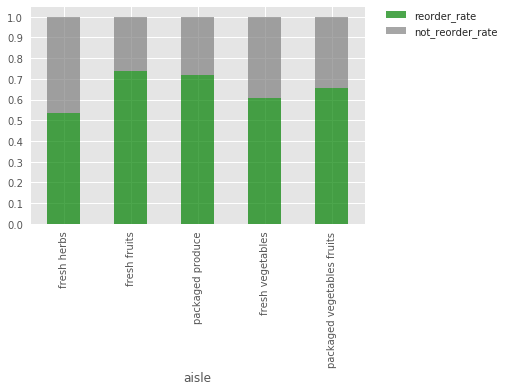

In [22]:
stacked('produce')

### Exploring Customer Habits

> #### Customers reordering only
> Here i look for customers who just reorder the same products again all the time. To search those I look at all orders (excluding the first order) and their total reorder rate.

I got different values than @phillippsp. He cutoff his order_number at >2, I set my cutoff at >1. My table also shows the reorder_rates for all users, not just those with a 100% reorder rate.

In [12]:
temp = pd.merge(left=order_products_prior[['order_id', 'product_id', 'reordered']],
        right=orders[['user_id', 'order_number']][orders.order_number > 1],
        left_on='order_id', right_index=True)
temp = pd.merge(left=orders[orders.order_number > 1].user_id.value_counts().to_frame('count'),
                right=temp.groupby('user_id').reordered.mean().to_frame('reorder_rate'),
                left_index=True, right_index=True)
temp.index.names = ['user_id']
print('temp is a DataFrame with user_id as index, number of orders per user, and reorder_rate for user')

temp is a DataFrame with user_id as index, number of orders per user, and reorder_rate for user


The customers with the most orders and a 100% reorder rate.

In [24]:
temp[temp.reorder_rate==1].sort_values('count', ascending=False).nlargest(10, 'count')

,count,reorder_rate
user_id,,
99753,99,1.0
170174,47,1.0
12025,45,1.0
37075,36,1.0
110225,35,1.0
190455,31,1.0
106143,26,1.0
167391,26,1.0
104684,25,1.0


A function that returns all info for a particular user.

In [14]:
def get_user(user_id):
    return pd.merge(left= pd.merge(left=orders[(orders.user_id==user_id) & (orders.eval_set=='prior')],
                   right=order_products_prior,
                   left_index=True,
                   right_on='order_id'),
                   right= products[['product_name']],
                   left_on='product_id',
                   right_index=True).sort_values(['order_number', 'add_to_cart_order']).drop(['user_id', 'product_id'], axis=1).reset_index(drop=True)

In [26]:
get_user(99753).head()

,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_id,add_to_cart_order,reordered,product_name
0,prior,1,2,8,NaN,2646617,1,0,Organic Reduced Fat Milk
1,prior,1,2,8,NaN,2646617,2,0,Organic Whole Milk
2,prior,2,4,8,2.0,208307,1,1,Organic Whole Milk
3,prior,2,4,8,2.0,208307,2,1,Organic Reduced Fat Milk
4,prior,3,2,8,5.0,1849591,1,1,Organic Reduced Fat Milk


What are these users buying?

In [15]:
for i in temp[temp.reorder_rate==1].sort_values('count', ascending=False).nlargest(10, 'count').index.values:
    print(get_user(i).product_name.unique())

['Organic Reduced Fat Milk' 'Organic Whole Milk']


['Reduced Fat 2% Milk']


['Orange Juice']


['Frozen Organic Blueberries']


['Frozen Organic Blueberries' 'Organic Strawberries']


['Natural Artesian Water' 'Natural Artisan Water'
 'Natural Artesian Water, Mini & Mobile']


['Organic Raspberry Black Tea']


['Organic Whole Milk']


['Organic Raspberry Black Tea']


['Organic Whole Milk']


['Natural Artesian Bottled Water']


['Coke' 'Hazelnut Bromstad Design Liquid Coffee Creamer']


Again, I would like to thank Dr. Phillipp Spachtholz for his hard work in creating the [original R notebook](https://www.kaggle.com/philippsp/exploratory-analysis-instacart/notebook). 